시계열 데이터

1.시간정보가 들어있는 데이터

- "세상에는 시계열 데이터가 참 많다
- 단어가 나타내는 순서가 중요하다
- 샘플의 길이가 다름
2.시계열 데이터를 인식하는 고전적인 모델
- ARIMA, SARIMA
- Prophet 등... 3.시계열 데이터를 인식하는 딥러닝 모델
- 순환 신경망(RNN)
- LSTM(Long short term memory) : 선별기억능력을 갖춰 장기 문맥처리에 유리
매일 기온, 습도, 미세먼지 농도를 기록한다. a1 = (23.2,42,0.25) a2=(, , ,)

- x = (a1,a2,a3 ,,,, at)
- 대표적인 응용은 미래 예측(prediction 또는 forecasting)
1. 내일 주가예측
2. 내일 날씨 예측
3. 기계의 고장 예측
4. 풍속과 풍향 예측(풍력 발전기의 효율 향상)
5. 농산물 가격/수요량 예측
6. 언어번역에 응용
7. 생성모델에 응용(사진을 보고 설명 문장 생성)

##### 비트코인 예측하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = open('./data/bitcoin.csv','r')
df = pd.read_csv(f,header=0)

#### Closing Price (USD) 종가만 가져온다

In [3]:
seq = df[['Closing Price (USD)']].to_numpy()

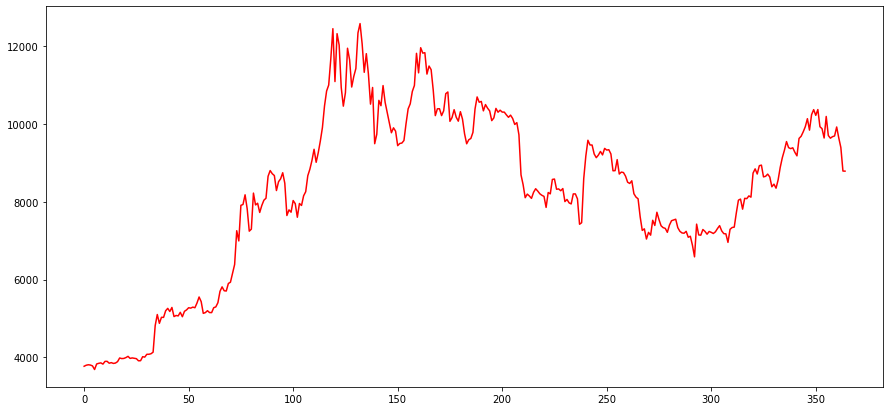

In [4]:
plt.figure(figsize=(15,7))
plt.plot(seq, color = 'red')
plt.show()

In [5]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [6]:
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)

In [7]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [8]:
x_train[0].shape

(7, 1)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 1s - loss: 1790.9292 - mae: 1790.9292 - val_loss: 334.8817 - val_mae: 334.8817 - 1s/epoch - 5ms/step
Epoch 2/200
250/250 - 0s - loss: 534.6046 - mae: 534.6046 - val_loss: 324.4891 - val_mae: 324.4891 - 422ms/epoch - 2ms/step
Epoch 3/200
250/250 - 0s - loss: 509.6776 - mae: 509.6776 - val_loss: 358.3982 - val_mae: 358.3982 - 412ms/epoch - 2ms/step
Epoch 4/200
250/250 - 0s - loss: 521.2747 - mae: 521.2747 - val_loss: 326.7059 - val_mae: 326.7059 - 409ms/epoch - 2ms/step
Epoch 5/200
250/250 - 0s - loss: 498.7055 - mae: 498.7055 - val_loss: 314.3684 - val_mae: 314.3684 - 424ms/epoch - 2ms/step
Epoch 6/200
250/250 - 0s - loss: 465.9523 - mae: 465.9523 - val_loss: 330.2613 - val_mae: 330.2613 - 398ms/epoch - 2ms/step
Epoch 7/200
250/250 - 0s - loss: 489.8294 - mae: 489.8294 - val_loss: 327.9074 - val_mae: 327.9074 - 397ms/epoch - 2ms/step
Epoch 8/200
250/250 - 0s - loss: 521.5737 - mae: 521.5737 - val_loss: 359.6193 - val_mae: 359.6193 - 399ms/epoch - 2ms/step
Epoch 9/2

Epoch 67/200
250/250 - 0s - loss: 267.6880 - mae: 267.6880 - val_loss: 169.2009 - val_mae: 169.2009 - 390ms/epoch - 2ms/step
Epoch 68/200
250/250 - 0s - loss: 267.4460 - mae: 267.4460 - val_loss: 204.0884 - val_mae: 204.0884 - 367ms/epoch - 1ms/step
Epoch 69/200
250/250 - 0s - loss: 274.6391 - mae: 274.6391 - val_loss: 200.4839 - val_mae: 200.4839 - 363ms/epoch - 1ms/step
Epoch 70/200
250/250 - 0s - loss: 265.5012 - mae: 265.5012 - val_loss: 236.3461 - val_mae: 236.3461 - 366ms/epoch - 1ms/step
Epoch 71/200
250/250 - 0s - loss: 264.4582 - mae: 264.4582 - val_loss: 239.7475 - val_mae: 239.7475 - 367ms/epoch - 1ms/step
Epoch 72/200
250/250 - 0s - loss: 258.8890 - mae: 258.8890 - val_loss: 169.8631 - val_mae: 169.8631 - 364ms/epoch - 1ms/step
Epoch 73/200
250/250 - 0s - loss: 263.7690 - mae: 263.7690 - val_loss: 167.7029 - val_mae: 167.7029 - 370ms/epoch - 1ms/step
Epoch 74/200
250/250 - 0s - loss: 262.1511 - mae: 262.1511 - val_loss: 403.8335 - val_mae: 403.8335 - 375ms/epoch - 1ms/step


Epoch 133/200
250/250 - 0s - loss: 269.0322 - mae: 269.0322 - val_loss: 219.3994 - val_mae: 219.3994 - 356ms/epoch - 1ms/step
Epoch 134/200
250/250 - 0s - loss: 257.2393 - mae: 257.2393 - val_loss: 184.4008 - val_mae: 184.4008 - 370ms/epoch - 1ms/step
Epoch 135/200
250/250 - 0s - loss: 259.1791 - mae: 259.1791 - val_loss: 165.2297 - val_mae: 165.2297 - 353ms/epoch - 1ms/step
Epoch 136/200
250/250 - 0s - loss: 256.9852 - mae: 256.9852 - val_loss: 192.2627 - val_mae: 192.2627 - 363ms/epoch - 1ms/step
Epoch 137/200
250/250 - 0s - loss: 266.6815 - mae: 266.6815 - val_loss: 212.8178 - val_mae: 212.8178 - 365ms/epoch - 1ms/step
Epoch 138/200
250/250 - 0s - loss: 258.9712 - mae: 258.9712 - val_loss: 165.2360 - val_mae: 165.2360 - 362ms/epoch - 1ms/step
Epoch 139/200
250/250 - 0s - loss: 256.5037 - mae: 256.5037 - val_loss: 177.3333 - val_mae: 177.3333 - 368ms/epoch - 1ms/step
Epoch 140/200
250/250 - 0s - loss: 273.5784 - mae: 273.5784 - val_loss: 190.3587 - val_mae: 190.3587 - 360ms/epoch - 1

250/250 - 0s - loss: 247.6490 - mae: 247.6490 - val_loss: 202.2112 - val_mae: 202.2112 - 385ms/epoch - 2ms/step
Epoch 199/200
250/250 - 0s - loss: 255.3810 - mae: 255.3810 - val_loss: 220.6472 - val_mae: 220.6472 - 372ms/epoch - 1ms/step
Epoch 200/200
250/250 - 0s - loss: 267.6151 - mae: 267.6151 - val_loss: 176.0429 - val_mae: 176.0429 - 382ms/epoch - 2ms/step


In [10]:
# LSTM 모델 평가
ev = model.evaluate(x_test,y_test,verbose = 0)
print(f"손실함수 : {ev[0]}, MAE : {ev[1]}")

손실함수 : 176.04293823242188, MAE : 176.04293823242188


In [11]:
# LSTM모델로 예측 수행
pred =  model.predict(x_test)
print(f"평균절댓값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/len(x_test)}")

평균절댓값 백분율 오차(MAPE) : [0.02133182]


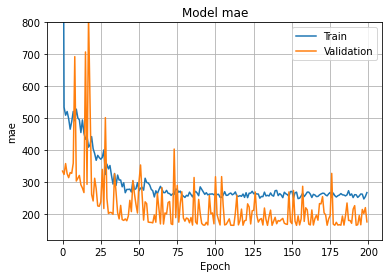

In [12]:
# 학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'] )
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

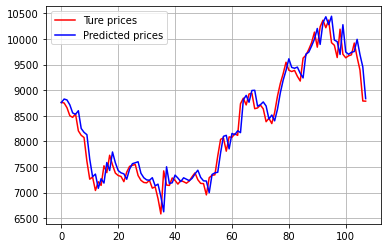

In [13]:
# 예측결과 시각화
x_range = range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red' )
plt.plot(x_range,pred[x_range],color='blue' )
plt.legend(['Ture prices','Predicted prices'], loc = 'best')
plt.grid()
plt.show()

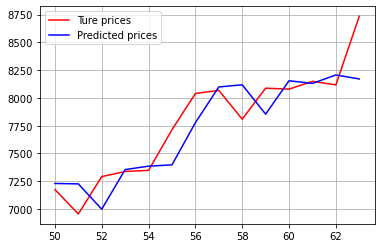

In [14]:
# 일부 구간을 확대하여 시각화
x_range = range(50,64)
plt.plot(x_range,y_test[x_range],color='red' )
plt.plot(x_range,pred[x_range],color='blue' )
plt.legend(['Ture prices','Predicted prices'], loc = 'best')
plt.grid()
plt.show()

In [15]:
# 다중채널 비트코인 가격 예측
seq = df[df.columns[2:]].to_numpy()
seq.shape

(365, 4)

In [16]:
X,Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0],Y[0])

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]


In [17]:
split = int(len(X)*0.7)
x_train = X[0:split]; y_train = Y[0:split]
x_test = X[split:]; y_test = Y[split:]

In [18]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 1s - loss: 843.9639 - mae: 843.9639 - val_loss: 751.1357 - val_mae: 751.1357 - 1s/epoch - 4ms/step
Epoch 2/200
250/250 - 0s - loss: 545.8403 - mae: 545.8403 - val_loss: 529.0036 - val_mae: 529.0036 - 375ms/epoch - 1ms/step
Epoch 3/200
250/250 - 0s - loss: 539.5060 - mae: 539.5060 - val_loss: 426.9479 - val_mae: 426.9479 - 375ms/epoch - 2ms/step
Epoch 4/200
250/250 - 0s - loss: 495.5101 - mae: 495.5101 - val_loss: 309.9303 - val_mae: 309.9303 - 369ms/epoch - 1ms/step
Epoch 5/200
250/250 - 0s - loss: 456.5739 - mae: 456.5739 - val_loss: 284.6746 - val_mae: 284.6746 - 369ms/epoch - 1ms/step
Epoch 6/200
250/250 - 0s - loss: 540.5605 - mae: 540.5605 - val_loss: 376.5704 - val_mae: 376.5704 - 367ms/epoch - 1ms/step
Epoch 7/200
250/250 - 0s - loss: 476.6230 - mae: 476.6230 - val_loss: 294.8878 - val_mae: 294.8878 - 391ms/epoch - 2ms/step
Epoch 8/200
250/250 - 0s - loss: 451.2682 - mae: 451.2682 - val_loss: 477.1116 - val_mae: 477.1116 - 385ms/epoch - 2ms/step
Epoch 9/200

Epoch 67/200
250/250 - 0s - loss: 182.4083 - mae: 182.4083 - val_loss: 120.2146 - val_mae: 120.2146 - 399ms/epoch - 2ms/step
Epoch 68/200
250/250 - 0s - loss: 184.6341 - mae: 184.6341 - val_loss: 151.4664 - val_mae: 151.4664 - 364ms/epoch - 1ms/step
Epoch 69/200
250/250 - 0s - loss: 190.1834 - mae: 190.1834 - val_loss: 171.5069 - val_mae: 171.5069 - 359ms/epoch - 1ms/step
Epoch 70/200
250/250 - 0s - loss: 187.0612 - mae: 187.0612 - val_loss: 127.6576 - val_mae: 127.6576 - 359ms/epoch - 1ms/step
Epoch 71/200
250/250 - 0s - loss: 196.1181 - mae: 196.1181 - val_loss: 119.8173 - val_mae: 119.8173 - 384ms/epoch - 2ms/step
Epoch 72/200
250/250 - 0s - loss: 182.7844 - mae: 182.7844 - val_loss: 119.7386 - val_mae: 119.7386 - 359ms/epoch - 1ms/step
Epoch 73/200
250/250 - 0s - loss: 189.8975 - mae: 189.8975 - val_loss: 121.0261 - val_mae: 121.0261 - 359ms/epoch - 1ms/step
Epoch 74/200
250/250 - 0s - loss: 181.8179 - mae: 181.8179 - val_loss: 163.6865 - val_mae: 163.6865 - 371ms/epoch - 1ms/step


Epoch 133/200
250/250 - 0s - loss: 174.8942 - mae: 174.8942 - val_loss: 121.5540 - val_mae: 121.5540 - 344ms/epoch - 1ms/step
Epoch 134/200
250/250 - 0s - loss: 178.9648 - mae: 178.9648 - val_loss: 120.8614 - val_mae: 120.8614 - 359ms/epoch - 1ms/step
Epoch 135/200
250/250 - 0s - loss: 174.9301 - mae: 174.9301 - val_loss: 120.5698 - val_mae: 120.5698 - 359ms/epoch - 1ms/step
Epoch 136/200
250/250 - 0s - loss: 177.6687 - mae: 177.6687 - val_loss: 116.8099 - val_mae: 116.8099 - 396ms/epoch - 2ms/step
Epoch 137/200
250/250 - 0s - loss: 179.4780 - mae: 179.4780 - val_loss: 113.5158 - val_mae: 113.5158 - 390ms/epoch - 2ms/step
Epoch 138/200
250/250 - 0s - loss: 177.5827 - mae: 177.5827 - val_loss: 124.4044 - val_mae: 124.4044 - 424ms/epoch - 2ms/step
Epoch 139/200
250/250 - 0s - loss: 167.6725 - mae: 167.6725 - val_loss: 134.5340 - val_mae: 134.5340 - 375ms/epoch - 1ms/step
Epoch 140/200
250/250 - 0s - loss: 171.6638 - mae: 171.6638 - val_loss: 124.2936 - val_mae: 124.2936 - 368ms/epoch - 1

250/250 - 0s - loss: 176.6775 - mae: 176.6775 - val_loss: 145.3255 - val_mae: 145.3255 - 362ms/epoch - 1ms/step
Epoch 199/200
250/250 - 0s - loss: 173.4520 - mae: 173.4520 - val_loss: 134.5487 - val_mae: 134.5487 - 375ms/epoch - 2ms/step
Epoch 200/200
250/250 - 0s - loss: 176.9687 - mae: 176.9687 - val_loss: 118.8898 - val_mae: 118.8898 - 358ms/epoch - 1ms/step


In [19]:
# LSTM 모델 평가
ev = model.evaluate(x_test,y_test,verbose = 0)
print(f"손실함수 : {ev[0]}, MAE : {ev[1]}")

손실함수 : 118.88983154296875, MAE : 118.88983154296875


In [20]:
# LSTM 모델로 예측 수행
pred =  model.predict(x_test)
print(f"평균절댓값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/len(x_test)}")

평균절댓값 백분율 오차(MAPE) : [0.01966015 0.00443425 0.01697516 0.01635023]


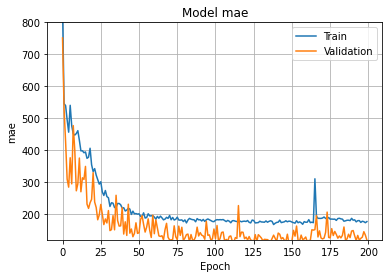

In [21]:
# 학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'] )
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()